In [1]:
from utils.load_results import *
from utils.plot_helpers import *
from utils.table_reps import *
from utils.concept_reps import *
from utils.analysis_from_interaction import error_analysis

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('default')
import random
from seaborn.algorithms import bootstrap
import os

# Quantitative analyses
This notebook contains code to plot and bootstrap confidence intervals for accuracies and other metrics for both context-unaware and context-aware trained agents.
Code defaults to context-aware, context-unaware results can be loaded by setting the context-unaware flag.

In [2]:
datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
n_values = [4, 8, 16, 4, 8, 4]
n_attributes = [3, 3, 3, 4, 4, 5]
n_epochs = 0
n_runs = 5
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_0' for d in datasets]

In [2]:
datasets = ['(3,4)', '(3,8)', '(4,4)']
n_values = [4, 8, 4]
n_attributes = [3, 3, 4]
n_epochs = 0
n_runs = 5
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_0' for d in datasets]

In [2]:
datasets = ['(3,4)', ]
n_values = [4, ]
n_attributes = [3, ]
n_epochs = 0
n_runs = 5
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_0' for d in datasets]

In [48]:
context_unaware = True # whether original or context_unaware simulations are evaluated
length_cost = True # whether length_cost was applied
early_stopping = True
rsa = True
rsa_test = 'test_load_train'
rsa_test_int = 'testtrain' # for use with interactions
if length_cost:
    if context_unaware:
        setting = 'length_cost/context_unaware'
    elif not context_unaware:
        setting = 'length_cost/context_aware'
else:
    if context_unaware:
        setting = 'context_unaware'
    else:
        setting = 'standard'

In [49]:
# get n_epochs if early stopping
if early_stopping:
    
    n_epochs = []
    for d in range(len(datasets)):
        
        for run in range(n_runs):
    
            path_to_run = paths[d] + '/' + str(setting) +'/' + str(run) + '/' 
            with open(os.path.join(path_to_run, 'loss_and_metrics.pkl'), 'rb') as input_file:
                data = pickle.load(input_file)
                final_epoch = max(data['loss_train'].keys())
                n_epochs.append(final_epoch)
                
if rsa:
    n_epochs = 0
            

## Number of utterances used in RSA

In [50]:
import torch
for d in range(len(datasets)):
    # every run is the same
    for run in range(1):

        path_to_run = paths[d] + '/' + str(setting) +'/' + str(run) + '/'
        path_to_interaction = (path_to_run + 'interactions/rsa_' + rsa_test_int + '/epoch_' + str(n_epochs) + '/interaction_gpu0')

        interaction = torch.load(path_to_interaction)
        print(len(interaction.sender_input))

250
1460
1000
1250
1000
1000


In [51]:
import torch
for d in range(len(datasets)):
    # every run is the same
    for run in range(n_runs):

        path_to_run = paths[d] + '/' + str(setting) +'/' + str(run) + '/'
        path_to_interaction = (path_to_run + 'interactions/rsa_' + rsa_test_int + '/epoch_' + str(n_epochs) + '/interaction_gpu0')

        interaction = torch.load(path_to_interaction)
        _, counts_sender_input = torch.unique(interaction.sender_input, return_counts=True, dim=0)
        _, counts_message = torch.unique(interaction.message, return_counts=True, dim=0)
        print(datasets[d], ": unique sender input: ", len(counts_sender_input), "; unique messages: ", len(counts_message))

(3,4) : unique sender input:  250 ; unique messages:  80
(3,4) : unique sender input:  250 ; unique messages:  53
(3,4) : unique sender input:  250 ; unique messages:  79
(3,4) : unique sender input:  250 ; unique messages:  72
(3,4) : unique sender input:  250 ; unique messages:  79
(3,8) : unique sender input:  1460 ; unique messages:  473
(3,8) : unique sender input:  1460 ; unique messages:  259
(3,8) : unique sender input:  1460 ; unique messages:  445
(3,8) : unique sender input:  1460 ; unique messages:  398
(3,8) : unique sender input:  1460 ; unique messages:  418
(3,16) : unique sender input:  1000 ; unique messages:  194
(3,16) : unique sender input:  1000 ; unique messages:  252
(3,16) : unique sender input:  1000 ; unique messages:  180
(3,16) : unique sender input:  1000 ; unique messages:  197
(3,16) : unique sender input:  1000 ; unique messages:  209
(4,4) : unique sender input:  1250 ; unique messages:  292
(4,4) : unique sender input:  1250 ; unique messages:  186
(4

In [52]:
# values taken from run printouts:
print("Context-unaware")
print("D(3,4): ", calc_mean_std([146, 138, 131, 153, 152]))
print("D(3,8): ", calc_mean_std([393, 194, 461, 451, 338]))
print("D(3,16): ", calc_mean_std([352, 539, 205, 259, 350]))
print("D(4,4): ", calc_mean_std([628, 512, 631, 549, 575]))
print("D(4,8): ", calc_mean_std([1818, 3274, 1471, 799, 1503]))
print("D(5,4): ", calc_mean_std([2212, 2996, 3009, 1933, 1811]))

Context-unaware
D(3,4):  144.00 ± 8.41
D(3,8):  367.40 ± 97.30
D(3,16):  341.00 ± 113.69
D(4,4):  579.00 ± 45.85
D(4,8):  1773.00 ± 820.71
D(5,4):  2392.20 ± 515.00


## Accuracies

### Training trajectories

In [92]:
all_accuracies = load_accuracies(paths, n_runs=n_runs, n_epochs=0, val_steps=1, zero_shot=False, context_unaware=context_unaware, length_cost=length_cost, early_stopping=early_stopping, rsa=rsa, rsa_test="rsa_"+rsa_test)

### Final accuracies 
Final accuracies heatmap plot + get accuracy means and sds for table representation.

In [93]:
rsa_test_accuracies = all_accuracies['rsa_test_acc']
test_accuracies = all_accuracies['final_test_acc']
rsa_test_gen_utt = all_accuracies['rsa_test_gen_utt_acc'] # only feasible for smallest dataset (and restricted message length)

In [94]:
test_accuracies

array([[0.73742235, 0.74975437, 0.73356396, 0.74559927, 0.72886157],
       [0.90620863, 0.89354312, 0.88225281, 0.90909475, 0.9061408 ],
       [0.91943419, 0.9547056 , 0.90284103, 0.88497043, 0.92935854],
       [0.88647723, 0.85203606, 0.93217117, 0.93325764, 0.92456067],
       [0.92220312, 0.96894306, 0.92276758, 0.9364574 , 0.96627808],
       [0.93674612, 0.94622242, 0.92523533, 0.96799922, 0.96006912]])

In [95]:
rsa_test_accuracies

array([[0.71804643, 0.68403524, 0.75853431, 0.73395848, 0.74050957],
       [0.79366118, 0.76494509, 0.80267078, 0.80015081, 0.81544465],
       [0.80240881, 0.83501172, 0.80276185, 0.8156786 , 0.8262043 ],
       [0.74330628, 0.71603757, 0.80061954, 0.78885388, 0.75858408],
       [0.76245201, 0.79306978, 0.80650467, 0.78472924, 0.78426504],
       [0.74836123, 0.74366969, 0.73867494, 0.760566  , 0.78261095]])

In [96]:
results = np.apply_along_axis(calc_mean_std, 1, test_accuracies)
df_test = pd.DataFrame(results, columns=['test'])
df_test.index = datasets
latex_table = df_test.to_latex()
print(latex_table)

results = np.apply_along_axis(calc_mean_std, 1, rsa_test_accuracies)
df_rsa = pd.DataFrame(results, columns=['rsa test'])
df_rsa.index = datasets
latex_table = df_rsa.to_latex()
print(latex_table)

\begin{tabular}{ll}
\toprule
{} &         test \\
\midrule
(3,4)  &  0.74 ± 0.01 \\
(3,8)  &  0.90 ± 0.01 \\
(3,16) &  0.92 ± 0.02 \\
(4,4)  &  0.91 ± 0.03 \\
(4,8)  &  0.94 ± 0.02 \\
(5,4)  &  0.95 ± 0.02 \\
\bottomrule
\end{tabular}

\begin{tabular}{ll}
\toprule
{} &     rsa test \\
\midrule
(3,4)  &  0.73 ± 0.03 \\
(3,8)  &  0.80 ± 0.02 \\
(3,16) &  0.82 ± 0.01 \\
(4,4)  &  0.76 ± 0.03 \\
(4,8)  &  0.79 ± 0.01 \\
(5,4)  &  0.75 ± 0.02 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_10995/230920838.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_test.to_latex()
/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_10995/230920838.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_rsa.to_latex()


## Message length

In [60]:
ml_dict = {'dataset': [], 'run': [], 'message length': []}
for d, dataset in enumerate(datasets): 
    for run in range(n_runs):
        ml = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + 
                                           '/message_length' + '_rsa_' + rsa_test_int + '.pkl', 'rb'))
            
        ml_dict['run'].append(run)
        ml_dict['dataset'].append(dataset)
        try: 
            ml_dict['message length'].append(np.mean(ml.numpy()))
        except: 
            ml_dict['message length'].append(np.NaN)
df_ml = pd.DataFrame(ml_dict)

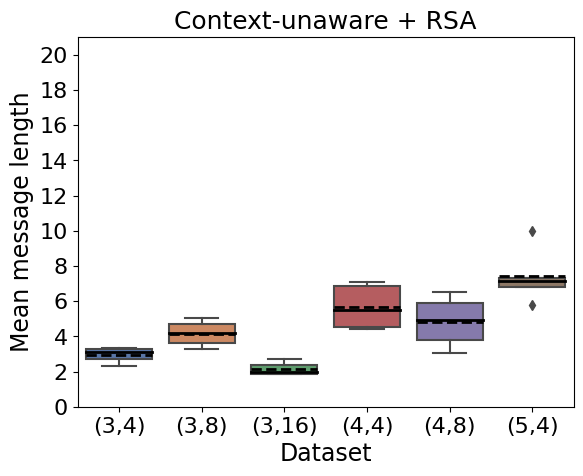

In [61]:
# Create a boxplot for each dataset
sns.boxplot(x='dataset', y='message length', data=df_ml, whis=1.5,
            palette='deep', showmeans=True, meanline=True, meanprops=dict(color="black", linestyle="--", linewidth=2), medianprops=dict(color="black", linewidth=2))
#g.set_titles(col_template="{col_name}", fontsize=50)
#g.set_axis_labels('# fixed attributes', '# symbols', fontsize=16)
plt.xlabel(xlabel='Dataset', fontsize=17)
plt.ylabel(ylabel='Mean message length', fontsize=17)
plt.xticks(fontsize=16)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], fontsize=16)
plt.ylim(0, 21)
#legend = plt.legend(fontsize=16, title='data set', bbox_to_anchor=(1., 0.8))
#plt.setp(legend.get_title(),fontsize='x-large')
if context_unaware:
    plt.title('Context-unaware + RSA', fontsize=18)
else:
    plt.title('Context-aware + RSA', fontsize=18)
plt.show()

### Message lengths per hierarchy level

In [62]:
ml_dict = {'level': [], 'data set': [], 'run': [], 'message length': []}
for d, dataset in enumerate(datasets): 
    for run in range(5):

        # if evaluated after training from interaction this is an array showing the message length
        # per level of concreteness (most abstract --> most concrete)
        ml_hierarchical = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + 
                                           '/message_length_hierarchical' + '_rsa_' + rsa_test_int + '.pkl', 'rb'))
        
        # if evaluated with the callback throughout training, you get an array for each epoch
        if isinstance(ml_hierarchical, dict): 
            ml_hierarchical = ml_hierarchical['message_length_train'][n_epochs]
            
        for level in range(5):
            
            ml_dict['level'].append(level)
            ml_dict['run'].append(run)
            ml_dict['data set'].append(dataset)
            try: 
                ml_dict['message length'].append(ml_hierarchical[level])
            except: 
                ml_dict['message length'].append(np.NaN)

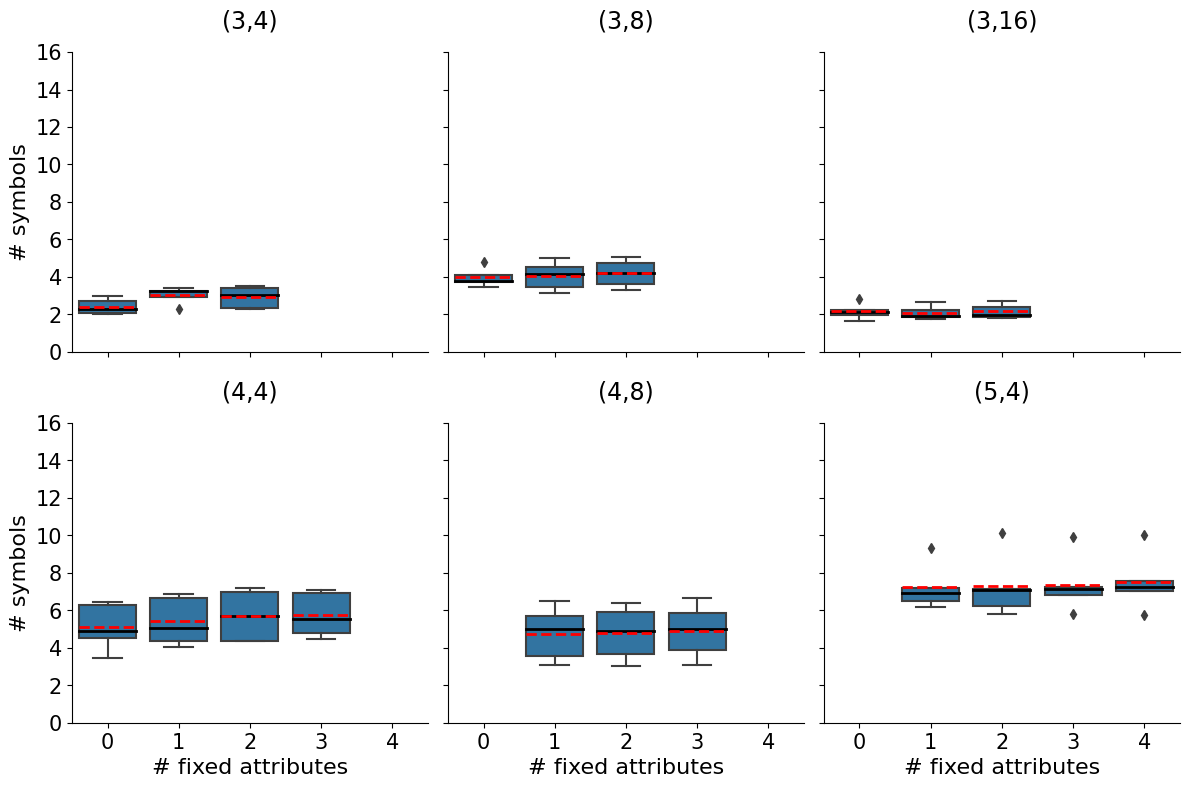

In [63]:
# Create a FacetGrid
g = sns.FacetGrid(pd.DataFrame(ml_dict), col="data set", col_wrap=3, sharey=True, height=4)
# Map the boxplot to each subplot in the grid
g.map(sns.boxplot, "level", "message length", order=range(5), showmeans=True, meanline=True, meanprops=dict(color="red", linestyle="--", linewidth=2), medianprops=dict(color="black", linewidth=2))
g.set_titles(col_template="{col_name}", fontsize=50)
g.set_axis_labels('# fixed attributes', '# symbols', fontsize=16)
for ax in g.axes.flatten():
    ax.set_title(ax.get_title(), fontsize=17, y=1.05)
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_ylim(0,16)
    ax.yaxis.set_ticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
g.tight_layout()
plt.show()

In [64]:
# latex table representation
df_ml = pd.DataFrame(ml_dict)

stats_ml = df_ml.groupby(['level', 'data set'])['message length'].agg(['mean', 'std']).reset_index()
stats_ml['message length'] = stats_ml['mean'].round(2).astype(str) + ' ± ' + stats_ml['std'].round(2).astype(str)
stats_ml = stats_ml.pivot_table(index='data set', columns='level', values='message length', aggfunc='first')
print(stats_ml.to_latex(index=True))

\begin{tabular}{llllll}
\toprule
level &            0 &            1 &            2 &            3 &            4 \\
data set &              &              &              &              &              \\
\midrule
(3,16)   &  2.16 ± 0.42 &  2.09 ± 0.35 &  2.15 ± 0.39 &    nan ± nan &    nan ± nan \\
(3,4)    &  2.42 ± 0.42 &  3.02 ± 0.44 &  2.91 ± 0.57 &    nan ± nan &    nan ± nan \\
(3,8)    &  3.98 ± 0.51 &  4.06 ± 0.76 &  4.19 ± 0.73 &    nan ± nan &    nan ± nan \\
(4,4)    &  5.13 ± 1.27 &   5.41 ± 1.3 &  5.72 ± 1.36 &   5.75 ± 1.2 &    nan ± nan \\
(4,8)    &    nan ± nan &  4.76 ± 1.43 &  4.78 ± 1.42 &  4.89 ± 1.45 &    nan ± nan \\
(5,4)    &    nan ± nan &  7.22 ± 1.22 &  7.27 ± 1.69 &  7.37 ± 1.53 &  7.53 ± 1.55 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_10995/1908375173.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats_ml.to_latex(index=True))


## Entropy scores

In [65]:
entropy_scores = load_entropies(paths, context_unaware=context_unaware, length_cost=length_cost, rsa=True, rsa_test=rsa_test_int) # 
entropies = [entropy_scores['NMI'], entropy_scores['effectiveness'], entropy_scores['consistency']]

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/load_results.py:489: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_dict[key] = np.array(result_dict[key])


### General

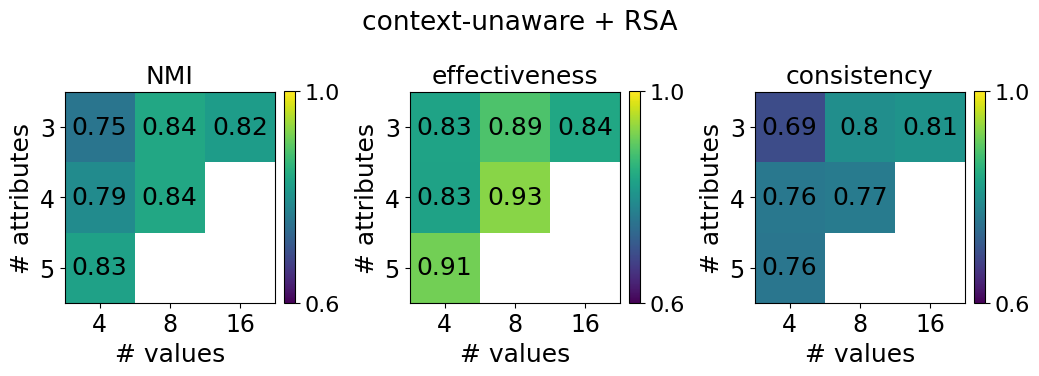

In [66]:
plot_heatmap(entropies, 'mean', plot_dims=(1,3), ylims=(0.6, 1.0), figsize=(10.5, 3.5), 
             titles = ('NMI', 'effectiveness', 'consistency'), suptitle='context-unaware + RSA')

#### Means and stds

In [67]:
entropy_dict = {}
for i, score in enumerate(list(entropy_scores.keys())[:3]):
    results = entropies[i]
    mean = np.nanmean(results, axis=-1)
    sd = np.std(results, axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict[d + score] = (round(mean[idx], 3), round(sd[idx], 3))
entropy_dict

{'(3,4)NMI': (0.755, 0.017),
 '(3,8)NMI': (0.84, 0.016),
 '(3,16)NMI': (0.822, 0.019),
 '(4,4)NMI': (0.793, 0.043),
 '(4,8)NMI': (0.84, 0.024),
 '(5,4)NMI': (0.828, 0.01),
 '(3,4)effectiveness': (0.832, 0.038),
 '(3,8)effectiveness': (0.889, 0.034),
 '(3,16)effectiveness': (0.838, 0.03),
 '(4,4)effectiveness': (0.831, 0.077),
 '(4,8)effectiveness': (0.929, 0.036),
 '(5,4)effectiveness': (0.915, 0.023),
 '(3,4)consistency': (0.692, 0.016),
 '(3,8)consistency': (0.797, 0.018),
 '(3,16)consistency': (0.806, 0.011),
 '(4,4)consistency': (0.76, 0.013),
 '(4,8)consistency': (0.767, 0.021),
 '(5,4)consistency': (0.757, 0.009)}

### Concept-dependent

In [68]:
# from generic to specific
entropies_hierarchical = [entropy_scores['NMI_hierarchical'], entropy_scores['effectiveness_hierarchical'], entropy_scores['consistency_context_dep']]
entropy_dict_context_dep = {}
for i, score in enumerate(list(entropy_scores.keys())[3:6]):
    results = entropies_hierarchical[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_context_dep[d + score] = mean[idx] #(mean[idx], sd[idx])


#### Plotting Concept-level

In [72]:
data_list, run_list, level_list = [], [], []
NMI_hierarchical, effectiveness_hierarchical, consistency_hierarchical = [], [], []

for d, data in enumerate(datasets):
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores_rsa_' + rsa_test_int + '.pkl', 'rb'))
        
        for l, level in enumerate([1, 2, 3, 4, 5]):  
            
            data_list.append(data)
            run_list.append(run)
            level_list.append(level)
            
            try: 
                NMI_hierarchical.append(scores['normalized_mutual_info_hierarchical'][l])
                effectiveness_hierarchical.append(scores['effectiveness_hierarchical'][l])
                consistency_hierarchical.append(scores['consistency_hierarchical'][l])
            except: 
                NMI_hierarchical.append(np.nan)
                effectiveness_hierarchical.append(np.nan)
                consistency_hierarchical.append(np.nan)

entropy_dict_hierarchical = {'data': data_list, 'level': level_list, 'run': run_list, 'NMI': NMI_hierarchical, 
                             'Effectiveness': effectiveness_hierarchical, 'Consistency': consistency_hierarchical}


In [73]:
all_hierarchical = {}
len_ds = len(entropy_dict_hierarchical['Effectiveness'])
all_hierarchical['metric'] = ['Effectiveness'] * len_ds + ['Consistency'] * len_ds + ['NMI'] * len_ds # change to 25 for one dataset
all_hierarchical['value'] = (entropy_dict_hierarchical['Effectiveness'] + 
                             entropy_dict_hierarchical['Consistency'] +
                             entropy_dict_hierarchical['NMI'])
all_hierarchical['level'] = entropy_dict_hierarchical['level'] * 3

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


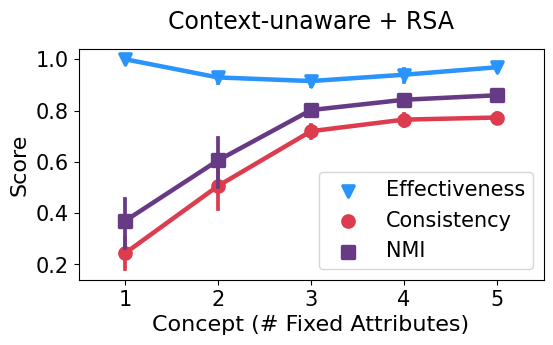

In [74]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_hierarchical, hue='metric', errorbar=('ci', 95),
                   markers=['v', 'o', 's'], palette=sns.color_palette(['#2A94FC', '#DC3C4D', '#673A85']), scale=1.2)
plt.ylabel('Score', fontsize=16)
if context_unaware:
    plt.title('Context-unaware + RSA', fontsize=17, y=1.05)
else:
    plt.title('Context-aware + RSA', fontsize=17, y=1.05)
#plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Concept (# Fixed Attributes)', fontsize=16)
plt.legend(fontsize=15, loc='lower right')
plt.show()

### Context-dependent

In [75]:
# from coarse to fine context
entropies_context_dep = [entropy_scores['NMI_context_dep'], entropy_scores['effectiveness_context_dep'], entropy_scores['consistency_context_dep']]
entropy_dict_context_dep = {}
for i, score in enumerate(list(entropy_scores.keys())[6:9]):
    results = entropies_context_dep[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_context_dep[d + score] = mean[idx] #(mean[idx], sd[idx])


#### Plotting per Context condition

In [76]:
data_list, run_list, level_list = [], [], []
NMI_context_dep, effectiveness_context_dep, consistency_context_dep = [], [], []

for d, data in enumerate(datasets):
    for run in range(5):
        
        scores = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/entropy_scores_rsa_' + rsa_test_int + '.pkl', 'rb'))
        
        for l, level in enumerate([1, 2, 3, 4, 5]):  
            
            data_list.append(data)
            run_list.append(run)
            level_list.append(level)
            
            try: 
                NMI_context_dep.append(scores['normalized_mutual_info_context_dep'][l])
                effectiveness_context_dep.append(scores['effectiveness_context_dep'][l])
                consistency_context_dep.append(scores['consistency_context_dep'][l])
            except: 
                NMI_context_dep.append(np.nan)
                effectiveness_context_dep.append(np.nan)
                consistency_context_dep.append(np.nan)

entropy_dict_context_dep = {'data': data_list, 'level': level_list, 'run': run_list, 'NMI': NMI_context_dep, 
                             'Effectiveness': effectiveness_context_dep, 'Consistency': consistency_context_dep}


In [77]:
all_context_dep = {}
len_ds = len(entropy_dict_context_dep['Effectiveness'])
all_context_dep['metric'] = ['Effectiveness'] * len_ds + ['Consistency'] * len_ds +['NMI'] * len_ds 
all_context_dep['value'] = (entropy_dict_context_dep['Effectiveness'] + 
                             entropy_dict_context_dep['Consistency'] +
                             entropy_dict_context_dep['NMI']
                            )
all_context_dep['level'] = entropy_dict_context_dep['level'] * 3

/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/kkobrock/opt/miniconda3/envs/egg/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


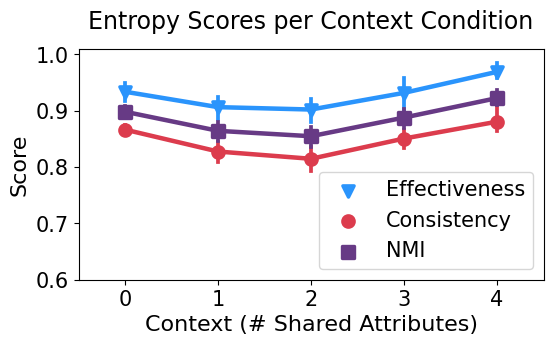

In [78]:
plt.figure(figsize=(6,3))
ax = sns.pointplot(x='level', y='value', data=all_context_dep, hue='metric', errorbar=('ci', 95),
                   markers=['v', 'o', 's'], palette=sns.color_palette(['#2A94FC', '#DC3C4D', '#673A85']), 
                   scale=1.2)
plt.ylabel('Score', fontsize=16)
plt.title('Entropy Scores per Context Condition', fontsize=17, y=1.05)
plt.ylim([0.6,1.01])
plt.xticks(ticks=[0,1,2,3,4], labels=[0,1,2,3,4])
plt.yticks(ticks=[0.6,0.7, 0.8, 0.9, 1.0], fontsize=15)
plt.xlabel('Context (# Shared Attributes)', fontsize=16)
plt.xticks(fontsize=15)
plt.legend(fontsize=15, loc='lower right')
plt.show()

### Concept x Context

In [79]:
# from generic&coarse to specific&fine
entropies_concept_x_context = [entropy_scores['NMI_concept_x_context'], entropy_scores['effectiveness_concept_x_context'], entropy_scores['consistency_concept_x_context']]
entropy_dict_conc_x_cont = {}
for i, score in enumerate(list(entropy_scores.keys())[9:]):
    results = entropies_context_dep[i]
    mean = np.mean(results, axis=-1)
    #sd = results.std(axis=-1)
    for idx, d in enumerate(datasets):
        entropy_dict_conc_x_cont[d + score] = mean[idx] #(mean[idx], sd[idx])

#### NMI

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/plot_helpers.py:141: RuntimeWarning: Mean of empty slice
  values = np.nanmean(results_ls, axis=0)


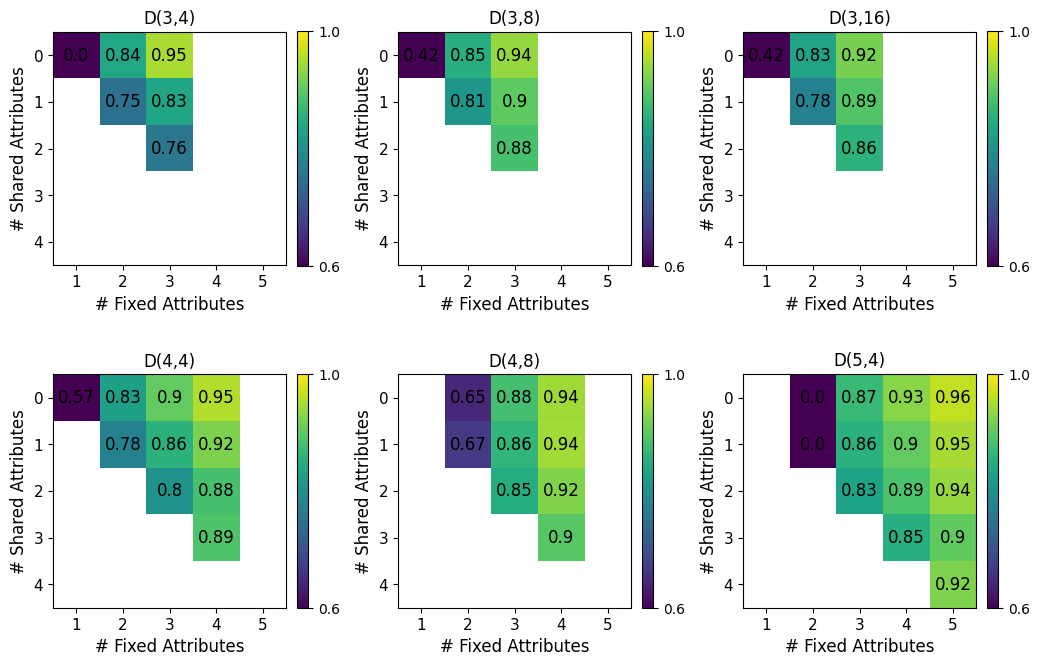

In [80]:
plot_heatmap_concept_x_context(entropies_concept_x_context, score='NMI', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 12)

#### effectiveness

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/plot_helpers.py:141: RuntimeWarning: Mean of empty slice
  values = np.nanmean(results_ls, axis=0)


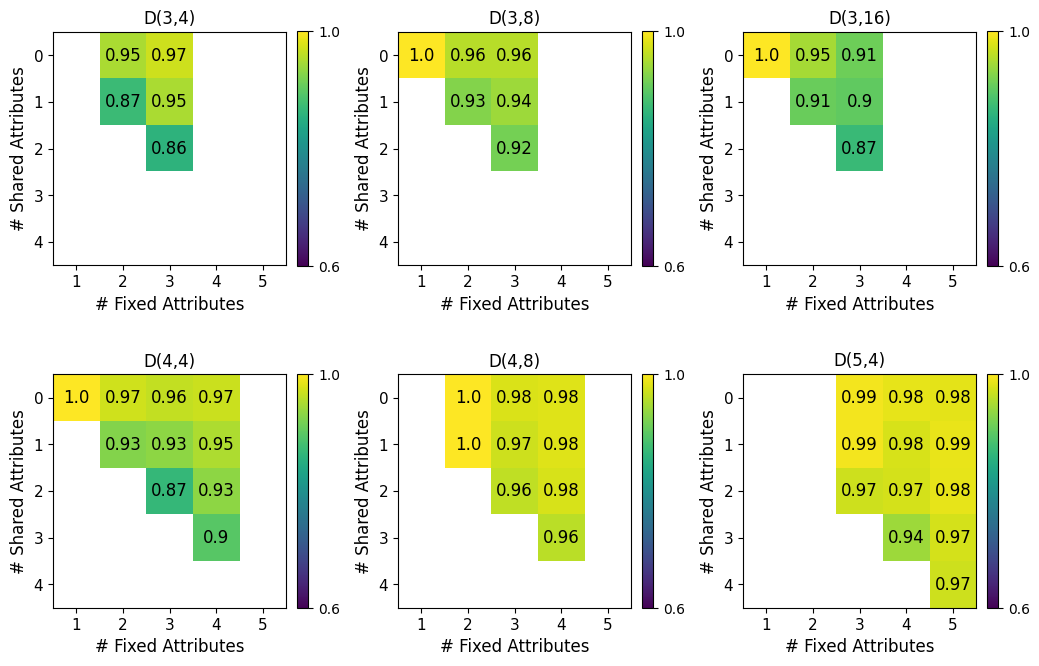

In [81]:
plot_heatmap_concept_x_context(entropies_concept_x_context, score='effectiveness', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 12)

#### consistency

/Users/kkobrock/Projects/phdproject1/emergent-abstractions/utils/plot_helpers.py:141: RuntimeWarning: Mean of empty slice
  values = np.nanmean(results_ls, axis=0)


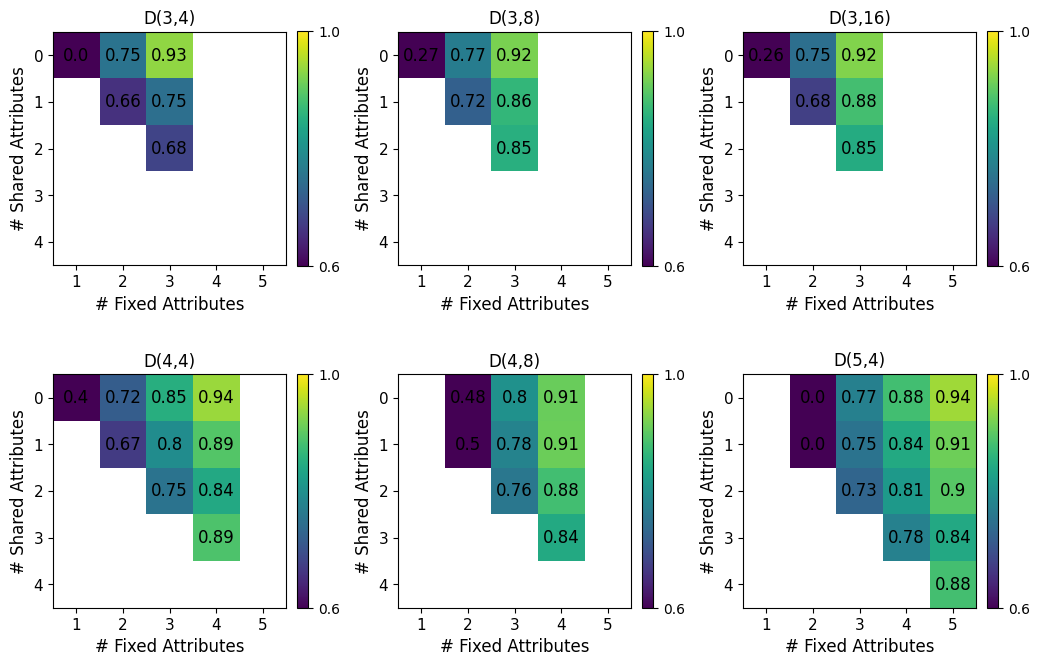

In [82]:
plot_heatmap_concept_x_context(entropies_concept_x_context, score='consistency', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 12)

## Symbol redundancy

In [84]:
symbol_redundancy_dict = {'level': [], 'data set': [], 'run': [], 'symbol frequency': []}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(run) + '/symbol_redundancy_rsa_' + rsa_test_int + '.pkl', 'rb'))
            
        for level in range(5):
            
            symbol_redundancy_dict['level'].append(level)
            symbol_redundancy_dict['run'].append(run)
            symbol_redundancy_dict['data set'].append(dataset)
            try: 
                symbol_redundancy_dict['symbol frequency'].append(scores['symbol_redundancy'][level])
            except: 
                symbol_redundancy_dict['symbol frequency'].append(np.NaN)

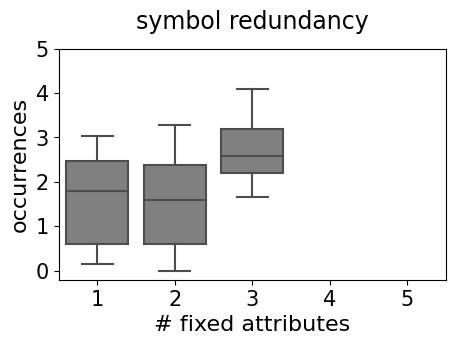

In [85]:
plt.figure(figsize=(5,3))
sns.boxplot(x='level', y='symbol frequency', data=symbol_redundancy_dict, color='gray')
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5], fontsize=15)
plt.yticks(ticks=[0, 1, 2, 3, 4, 5], fontsize=15)
plt.xlabel('# fixed attributes', fontsize=16)
plt.ylabel('occurrences', fontsize=16)
plt.title('symbol redundancy', fontsize=17, y=1.05)
plt.show()

## Lexicon properties

### Determine vocab size and message reuse

In [86]:
# get n_epochs if early stopping
if early_stopping:
    
    n_epochs_all_data = []
    for d in range(len(datasets)):
        
        n_epochs = []
        
        for run in range(n_runs):
    
            path_to_run = paths[d] + '/' + str(setting) +'/' + str(run) + '/' 
            with open(os.path.join(path_to_run, 'loss_and_metrics.pkl'), 'rb') as input_file:
                data = pickle.load(input_file)
                final_epoch = max(data['loss_train'].keys())
                n_epochs.append(final_epoch)
                
        n_epochs_all_data.append(n_epochs)
        
else:
    n_epochs_all_data = []
    for d in range(len(datasets)):
        n_epochs = []
        
        for run in range(n_runs):
            n_epochs.append(epochs)
                
        n_epochs_all_data.append(n_epochs)
            

In [87]:
# go through all datasets
for i, d in enumerate(datasets):
    print(d)
    n_epochs = n_epochs_all_data[i]
    for run in range(5):
        path_to_run = paths[i] + '/' + str(setting) +'/' + str(run) + '/'
        path_to_interaction_train = (path_to_run + 'interactions/train' + '/epoch_' + str(n_epochs[run]) + '/interaction_gpu0')
        path_to_interaction_test = (path_to_run + 'interactions/rsa_test_load_train/epoch_0/interaction_gpu0')
        path_to_interaction_rsa = (path_to_run + 'interactions/rsa_testtrain/epoch_0/interaction_gpu0')
        interaction_train = torch.load(path_to_interaction_train)
        interaction_test = torch.load(path_to_interaction_test)
        interaction_rsa = torch.load(path_to_interaction_rsa)
        
        concepts_train = objects_to_concepts(interaction_train.sender_input, n_values[i])
        concepts_test = objects_to_concepts(interaction_test.sender_input, n_values[i])
        concepts_rsa = objects_to_concepts(interaction_rsa.sender_input, n_values[i])
        
        messages_train = retrieve_messages(interaction_train)
        messages_test = retrieve_messages(interaction_test)
        messages_rsa = retrieve_messages(interaction_rsa)
    
        symbol_counts_train = count_symbols(messages_train)
        symbol_counts_test = count_symbols(messages_test)
        symbol_counts_rsa = count_symbols(messages_rsa)
        symbol_counts = [symbol_counts_train, symbol_counts_test, symbol_counts_rsa]
        pickle.dump(symbol_counts, open(path_to_run + 'symbol_counts_' + str(rsa_test) + '.pkl', 'wb'))
        
        # consider only unique messages
        messages_train_unique = get_unique_message_set(messages_train)
        messages_test_unique = get_unique_message_set(messages_test)
        messages_rsa_unique = get_unique_message_set(messages_rsa)
        messages_comb = [len(messages_train_unique), len(messages_test_unique), len(messages_rsa_unique)]
        
        # concepts
        concepts_train_unique = get_unique_concept_set(concepts_train)
        concepts_test_unique = get_unique_concept_set(concepts_test)
        concepts_rsa_unique = get_unique_concept_set(concepts_rsa)
        num_of_concepts = [len(concepts_train_unique), len(concepts_test_unique), len(concepts_rsa_unique)]
        pickle.dump(num_of_concepts, open(path_to_run + 'num_of_concepts_' + str(rsa_test) + '.pkl', 'wb'))
        
        # messages used in training reused in testing:
        intersection_test = messages_test_unique & messages_train_unique
        intersection_rsa = messages_rsa_unique & messages_train_unique
        
        # messages that are used in both normal testing and rsa testing
        intersection_both = messages_test_unique & messages_rsa_unique
        
        # # messages from training not reused in testing:
        # difference_train = messages_train_unique - messages_test_unique
        # 
        # # messages only used in testing:
        difference_test = messages_test_unique - messages_train_unique
        difference_rsa = messages_rsa_unique - messages_train_unique
        print("test:", len(difference_test), "novel messages used for the", len(concepts_test_unique), "novel concepts")
        print("rsa:", len(difference_rsa), "novel messages used for the", len(concepts_rsa_unique), "novel concepts")
        
        message_reuse = [len(messages_train_unique), len(concepts_test_unique), len(messages_test_unique), len(messages_rsa_unique), len(intersection_test), len(intersection_rsa), len(intersection_both), len(difference_test), len(difference_rsa)]
        pickle.dump(message_reuse, open(path_to_run + 'message_reuse_' + str(rsa_test) + '.pkl', 'wb'))

(3,4)
test: 141 novel messages used for the 160 novel concepts
rsa: 0 novel messages used for the 160 novel concepts
test: 126 novel messages used for the 160 novel concepts
rsa: 0 novel messages used for the 160 novel concepts
test: 126 novel messages used for the 160 novel concepts
rsa: 0 novel messages used for the 160 novel concepts
test: 153 novel messages used for the 160 novel concepts
rsa: 0 novel messages used for the 160 novel concepts
test: 152 novel messages used for the 160 novel concepts
rsa: 0 novel messages used for the 160 novel concepts
(3,8)
test: 374 novel messages used for the 479 novel concepts
rsa: 0 novel messages used for the 479 novel concepts
test: 93 novel messages used for the 479 novel concepts
rsa: 0 novel messages used for the 479 novel concepts
test: 449 novel messages used for the 479 novel concepts
rsa: 0 novel messages used for the 479 novel concepts
test: 439 novel messages used for the 479 novel concepts
rsa: 0 novel messages used for the 479 novel

In [88]:
message_reuse_dict = {'# messages train': [], '# messages test': [], '# messages rsa': [], '# concepts test': [], 
                      'reuse rate test': [], 'novelty rate test': [], 'total ratio test': [],
                      'reuse rate rsa': [], 'novelty rate rsa': [], 'total ratio rsa': [],
                      'shared messages test': [], 'shared messages rsa': []}
for i, d in enumerate(datasets):
    train_messages, test_messages, rsa_messages, test_concepts, reuse_test, novelty_test, ratio_test, reuse_rsa, novelty_rsa, ratio_rsa, shared_test, shared_rsa = [], [], [], [], [], [], [], [], [], [], [], []
    for run in range(5):
        path_to_run = paths[i] + '/' + str(setting) +'/' + str(run) + '/'
        message_reuse = pickle.load(open(path_to_run + 'message_reuse_' + str(rsa_test) + '.pkl', 'rb'))
        train_messages.append(message_reuse[0])
        test_messages.append(message_reuse[2])
        rsa_messages.append(message_reuse[3])
        test_concepts.append(message_reuse[1])
        # reuse rate: intersection(train & test) / test
        reuse_test.append(message_reuse[4]/message_reuse[2])
        reuse_rsa.append(message_reuse[5]/message_reuse[3])
        # novelty rate: difference(test - train) / test
        novelty_test.append(message_reuse[7]/message_reuse[2])
        novelty_rsa.append(message_reuse[8]/message_reuse[3])
        # test_messages / test_concepts (novel unique messages & concepts)
        ratio_test.append(message_reuse[2]/message_reuse[1]) 
        ratio_rsa.append(message_reuse[3]/message_reuse[1]) 
        shared_test.append(message_reuse[6]/message_reuse[2])
        shared_rsa.append(message_reuse[6]/message_reuse[3])
    message_reuse_dict['# messages train'].append(train_messages)
    message_reuse_dict['# messages test'].append(test_messages)
    message_reuse_dict['# messages rsa'].append(rsa_messages)
    message_reuse_dict['# concepts test'].append(test_concepts)
    message_reuse_dict['reuse rate test'].append(reuse_test)
    message_reuse_dict['novelty rate test'].append(novelty_test)
    message_reuse_dict['total ratio test'].append(ratio_test)
    message_reuse_dict['reuse rate rsa'].append(reuse_rsa)
    message_reuse_dict['novelty rate rsa'].append(novelty_rsa)
    message_reuse_dict['total ratio rsa'].append(ratio_rsa)
    message_reuse_dict['shared messages test'].append(shared_test)
    message_reuse_dict['shared messages rsa'].append(shared_rsa)

In [89]:
message_reuse_test = [message_reuse_dict['# concepts test'], message_reuse_dict['# messages test'], message_reuse_dict['novelty rate test'], message_reuse_dict['shared messages test']]

# Convert the list to a NumPy array
mess_reuse_array = np.array(message_reuse_test)

# Compute means and standard deviations over the five runs
means = np.mean(mess_reuse_array, axis=-1)
std_devs = np.std(mess_reuse_array, axis=-1)

# Row names and column names
row_names = ["D(3,4)", "D(3,8)", "D(3,16)", "D(4,4)", "D(4,8)", "D(5,4)"]
col_names = ["\# concepts", "\# messages", "novelty rate", "shared with rsa"]

# Prepare the data for the DataFrames
data = []

# iterate over datasets
for i in range(means.shape[1]):
    row = []
    # iterate over conditions
    for j in range(means.shape[0]):
        if j > 1:
            formatted_value = f"{means[j, i]:.2f} $\\pm$ {std_devs[j, i]:.2f}"
        elif j == 0:
            formatted_value = f"{int(means[j, i])}"
        else:
            formatted_value = f"{means[j, i]:.1f} $\\pm$ {std_devs[j, i]:.1f}"
        row.append(formatted_value)
    data.append(row)

# Create DataFrames
df = pd.DataFrame(data, index=row_names, columns=col_names)

# Convert DataFrames to LaTeX tables
latex_table = df.to_latex(index=True, escape=False)

print(latex_table)

\begin{tabular}{lllll}
\toprule
{} & \# concepts &       \# messages &     novelty rate &  shared with rsa \\
\midrule
D(3,4)  &         160 &   144.0 $\pm$ 8.4 &  0.97 $\pm$ 0.03 &  0.01 $\pm$ 0.01 \\
D(3,8)  &         479 &  367.4 $\pm$ 97.3 &  0.86 $\pm$ 0.19 &  0.08 $\pm$ 0.11 \\
D(3,16) &         262 &   83.8 $\pm$ 11.0 &  0.03 $\pm$ 0.03 &  0.62 $\pm$ 0.02 \\
D(4,4)  &         701 &  579.0 $\pm$ 45.8 &  0.98 $\pm$ 0.03 &  0.00 $\pm$ 0.00 \\
D(4,8)  &         514 &  182.0 $\pm$ 58.3 &  0.32 $\pm$ 0.24 &  0.20 $\pm$ 0.11 \\
D(5,4)  &         694 &  407.0 $\pm$ 74.2 &  0.86 $\pm$ 0.06 &  0.02 $\pm$ 0.01 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_10995/4257314575.py:35: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=True, escape=False)


In [90]:
message_reuse_data = [message_reuse_dict['# concepts test'], message_reuse_dict['# messages train']]

# Convert the list to a NumPy array
mess_reuse_array = np.array(message_reuse_data)

# Compute means and standard deviations over the five runs
means = np.mean(mess_reuse_array, axis=-1)
std_devs = np.std(mess_reuse_array, axis=-1)

# Row names and column names
row_names = ["D(3,4)", "D(3,8)", "D(3,16)", "D(4,4)", "D(4,8)", "D(5,4)"]
col_names = ["\# concepts", "\# messages"]

# Prepare the data for the DataFrames
data = []

# iterate over datasets
for i in range(means.shape[1]):
    row = []
    # iterate over conditions
    for j in range(means.shape[0]):
        if j == 0:
            formatted_value = f"{int(means[j, i])}"
        else:
            formatted_value = f"{means[j, i]:.0f} $\\pm$ {std_devs[j, i]:.0f}"
        row.append(formatted_value)
    data.append(row)

# Create DataFrames
df = pd.DataFrame(data, index=row_names, columns=col_names)

# Convert DataFrames to LaTeX tables
latex_table = df.to_latex(index=True, escape=False)

print(latex_table)

\begin{tabular}{lll}
\toprule
{} & \# concepts &       \# messages \\
\midrule
D(3,4)  &         160 &      641 $\pm$ 85 \\
D(3,8)  &         479 &   3276 $\pm$ 1093 \\
D(3,16) &         262 &    2398 $\pm$ 798 \\
D(4,4)  &         701 &    3508 $\pm$ 256 \\
D(4,8)  &         514 &  13261 $\pm$ 8355 \\
D(5,4)  &         694 &  14526 $\pm$ 1658 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_10995/1442344648.py:33: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=True, escape=False)


In [91]:
message_reuse_rsa = [message_reuse_dict['# concepts test'], message_reuse_dict['# messages train'], message_reuse_dict['# messages rsa'], message_reuse_dict['reuse rate rsa'], message_reuse_dict['shared messages rsa']]

# Convert the list to a NumPy array
mess_reuse_array = np.array(message_reuse_rsa)

# Compute means and standard deviations over the five runs
means = np.mean(mess_reuse_array, axis=-1)
std_devs = np.std(mess_reuse_array, axis=-1)

# Row names and column names
row_names = ["D(3,4)", "D(3,8)", "D(3,16)", "D(4,4)", "D(4,8)", "D(5,4)"]
col_names = ["\# concepts", "\# messages train", "\# messages rsa", "reuse rate", "shared with test"]

# Prepare the data for the DataFrames
data = []

# iterate over datasets
for i in range(means.shape[1]):
    row = []
    # iterate over conditions
    for j in range(means.shape[0]):
        if j > 1:
            formatted_value = f"{means[j, i]:.2f} $\\pm$ {std_devs[j, i]:.2f}"
        elif j == 0:
            formatted_value = f"{int(means[j, i])}"
        else:
            formatted_value = f"{means[j, i]:.1f} $\\pm$ {std_devs[j, i]:.1f}"
        row.append(formatted_value)
    data.append(row)

# Create DataFrames
df = pd.DataFrame(data, index=row_names, columns=col_names)

# Convert DataFrames to LaTeX tables
latex_table = df.to_latex(index=True, escape=False)

print(latex_table)

\begin{tabular}{llllll}
\toprule
{} & \# concepts &     \# messages train &     \# messages rsa &       reuse rate & shared with test \\
\midrule
D(3,4)  &         160 &      641.2 $\pm$ 84.8 &   72.60 $\pm$ 10.21 &  1.00 $\pm$ 0.00 &  0.02 $\pm$ 0.02 \\
D(3,8)  &         479 &   3275.8 $\pm$ 1093.3 &  398.60 $\pm$ 74.23 &  1.00 $\pm$ 0.00 &  0.06 $\pm$ 0.08 \\
D(3,16) &         262 &    2398.2 $\pm$ 797.6 &  206.40 $\pm$ 24.60 &  1.00 $\pm$ 0.00 &  0.25 $\pm$ 0.03 \\
D(4,4)  &         701 &    3508.0 $\pm$ 256.4 &  324.60 $\pm$ 77.95 &  1.00 $\pm$ 0.00 &  0.01 $\pm$ 0.01 \\
D(4,8)  &         514 &  13261.4 $\pm$ 8355.3 &  397.80 $\pm$ 51.62 &  1.00 $\pm$ 0.00 &  0.08 $\pm$ 0.04 \\
D(5,4)  &         694 &  14526.2 $\pm$ 1657.8 &  376.20 $\pm$ 50.52 &  1.00 $\pm$ 0.00 &  0.02 $\pm$ 0.01 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_10995/1603733104.py:35: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=True, escape=False)


### Symbol reuse
Also in "to generic" condition, all symbols are reused during testing, i.e. they all encode relevant information. This is why a qualitative analysis of messages makes more sense.

In [107]:
context_unaware = False # whether original or context_unaware simulations are evaluated
zero_shot = True # whether zero-shot simulations are evaluated
zero_shot_test = 'generic' # 'generic' or 'specific'
test_interactions = True # whether scores should be calculated on test interactions (only with zero shot)
setting = ""
if context_unaware:
    setting = setting + 'context_unaware'
else:
    setting = setting + 'standard'
if zero_shot:
    setting = setting + '/zero_shot/' + zero_shot_test

In [108]:
for run in range(5):
    path_to_run = paths[0] + '/' + str(setting) +'/' + str(run) + '/'
    path_to_interaction_train = (path_to_run + 'interactions/train/epoch_' + str(n_epochs) + '/interaction_gpu0')
    path_to_interaction_val = (path_to_run + 'interactions/validation/epoch_' + str(n_epochs) + '/interaction_gpu0')
    path_to_interaction_test = (path_to_run + 'interactions/test/epoch_0/interaction_gpu0')
    interaction_train = torch.load(path_to_interaction_train)
    interaction_val = torch.load(path_to_interaction_val)
    interaction_test = torch.load(path_to_interaction_test)
    
    # retrieve "lexicon" based on mutual information
    # hard-code for D(3,4) for now
    favorite_symbol, mutual_information = symbol_frequency_fav(interaction_train, n_attributes=3, n_values=4, vocab_size=13)
    print(favorite_symbol)

    messages = interaction_test.message.argmax(dim=-1)
    messages = [msg.tolist() for msg in messages]
    sender_input = interaction_test.sender_input
    print(sender_input.shape)
    n_targets = int(sender_input.shape[1]/2)
    # get target objects and fixed vectors to re-construct concepts
    target_objects = sender_input[:, :n_targets]
    target_objects = k_hot_to_attributes(target_objects, n_values[i])
    # concepts are defined by a list of target objects (here one sampled target object) and a fixed vector
    (objects, fixed) = retrieve_concepts_sampling(target_objects, all_targets=True)
    concepts = list(zip(objects, fixed))

    # get distractor objects to re-construct context conditions
    distractor_objects = sender_input[:, n_targets:]
    distractor_objects = k_hot_to_attributes(distractor_objects, n_values[i])
    context_conds = retrieve_context_condition(objects, fixed, distractor_objects)

    # get random qualitative samples
    #fixed_index = random.randint(0, n_attributes[i]-1) # define a fixed index for the concept
    #n_fixed = random.randint(1, n_attributes[i]) # how many fixed attributes?
    n_fixed = 3
    #fixed_indices = random.sample(range(0, n_attributes[i]), k=n_fixed) # select which attributes are fixed
    fixed_indices = [0, 1, 2]
    #fixed_value = random.randint(0, n_values[i]-1) # define a fixed value for this index
    fixed_values = random.choices(range(0, n_values[i]), k=n_fixed)
    fixed_values = [3, 0, 1]
    print(n_fixed, fixed_indices, fixed_values)
    #index_threshold = 20000 # optional: define some index threshold to make sure that examples are not taken from the beginning of training
    # TODO: adapt this loop such that multiple indices can be fixed
    all_for_this_concept = []
    for idx, (t_objects, t_fixed) in enumerate(concepts):
        #if sum(t_fixed) == 1 and t_fixed[fixed_index] == 1:# and idx > index_threshold:
        if sum(t_fixed) == n_fixed and all(t_fixed[fixed_index] == 1 for fixed_index in fixed_indices):
            for t_object in t_objects:
                if all(t_object[fixed_index] == fixed_values[j] for j, fixed_index in enumerate(fixed_indices)):
                    all_for_this_concept.append((idx, t_object, t_fixed, context_conds[idx], messages[idx]))
                    fixed = t_fixed
    if len(all_for_this_concept) > 0:
        #sample = random.sample(all_for_this_concept, 20)
        sample = all_for_this_concept
        column_names = ['game_nr', 'object', 'fixed indices', 'context condition', 'message']
        df = pd.DataFrame(sample, columns=column_names)
        print(df)
        #df.to_csv('analysis/quali_' + str(d) + '_' + str(setting) + '_' + str(sample[0][1]) + ',' + str(fixed) + 'all.csv', index=False)
        #print('saved ' + 'analysis/quali_' + str(d) + '_' + str(setting) + '_' + str(sample[0][1]) + ',' + str(fixed) + 'all.csv')
    else:
        raise ValueError("sample for dataset " + str(d) + " could not be generated")

{'00': 11, '01': 11, '02': 11, '03': 11, '10': 2, '11': 12, '12': 7, '13': 2, '20': 8, '21': 8, '22': 8, '23': 8}
torch.Size([60, 20, 12])
3 [0, 1, 2] [3, 0, 1]


ValueError: sample for dataset (3,4) could not be generated

## Compositionality

In [42]:
topsim, posdis, bosdis = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))
topsim_specific, posdis_specific, bosdis_specific = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))
topsim_generic, posdis_generic, bosdis_generic = np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5)), np.zeros((n_datasets, 5))

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim_score = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent_score = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        topsim[d, run] = topsim_score['topsim_train']
        posdis[d, run] = disent_score['posdis']
        bosdis[d, run] = disent_score['bosdis']
        topsim_specific[d, run] = topsim_score['topsim_specific_train']
        posdis_specific[d, run] = disent_score['posdis_specific']
        bosdis_specific[d, run] = disent_score['bosdis_specific']
        topsim_generic[d, run] = topsim_score['topsim_generic_train']
        posdis_generic[d, run] = disent_score['posdis_generic']
        bosdis_generic[d, run] = disent_score['bosdis_generic']

### Topsim

In [42]:
for i, d in enumerate(datasets):
    print(d, "topsim:", round(np.mean(topsim[i]), 3), "sd", round(np.std(topsim[i]), 2))

(3,4) topsim: 0.46 sd 0.07
(3,8) topsim: 0.411 sd 0.06
(3,16) topsim: 0.287 sd 0.04
(4,4) topsim: 0.418 sd 0.04
(4,8) topsim: 0.336 sd 0.05
(5,4) topsim: 0.431 sd 0.06


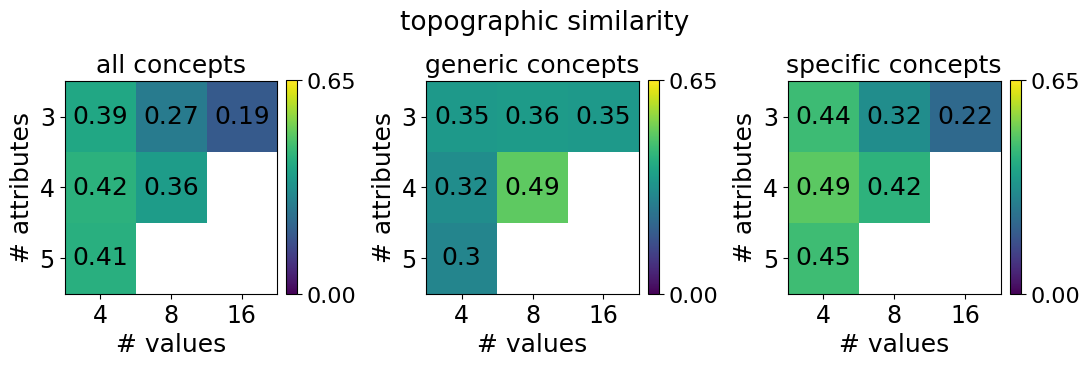

In [43]:
plot_heatmap([topsim, topsim_generic, topsim_specific], 'mean', plot_dims=(1,3), ylims=[0.0,0.65], figsize=(11,3.5), 
             titles=['all concepts', 'generic concepts', 'specific concepts'], suptitle='topographic similarity', suptitle_position=1.)

#### Topographic similarity over time

In [12]:
topsim_over_time = {}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        scores = pickle.load(open(paths[d]  + '/' + setting + '/' + str(run) + '/topsim_over_time.pkl', 'rb'))
            
        topsim_over_time[d][run] = scores
            
plt.plot(topsim_over_time[0][0])
round(max(topsim_over_time[0][0]) - min(topsim_over_time[0][0]), 3)

FileNotFoundError: [Errno 2] No such file or directory: 'results/(3,4)_game_size_10_vsf_3/standard/0/topsim_over_time.pkl'

### Posdis

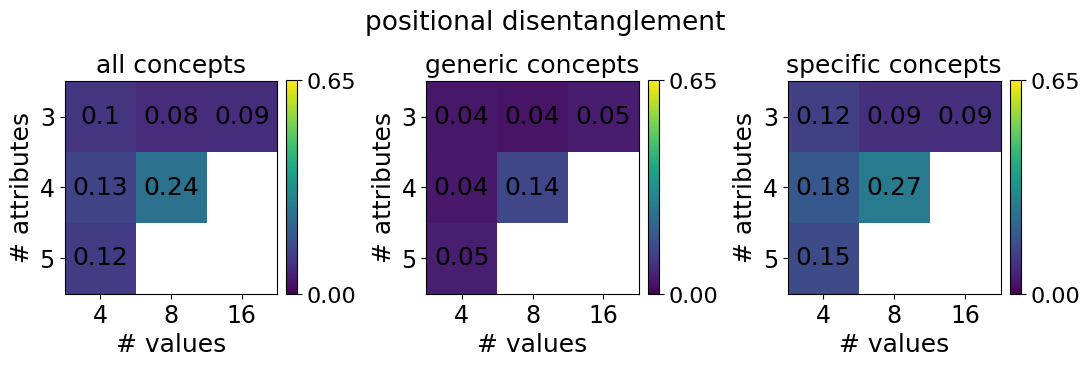

In [44]:
plot_heatmap([posdis, posdis_generic, posdis_specific], 'mean', plot_dims=(1,3), ylims=[0.0,0.65], figsize=(11,3.5),
             titles=['all concepts', 'generic concepts', 'specific concepts'], suptitle='positional disentanglement', suptitle_position=1.)

In [52]:
posdis = []

for d, dataset in enumerate(datasets): 
    sublist = []
    for run in range(5):
        sublist.append(pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/posdis_scores.pkl', 'rb')))
    posdis.append(sublist)

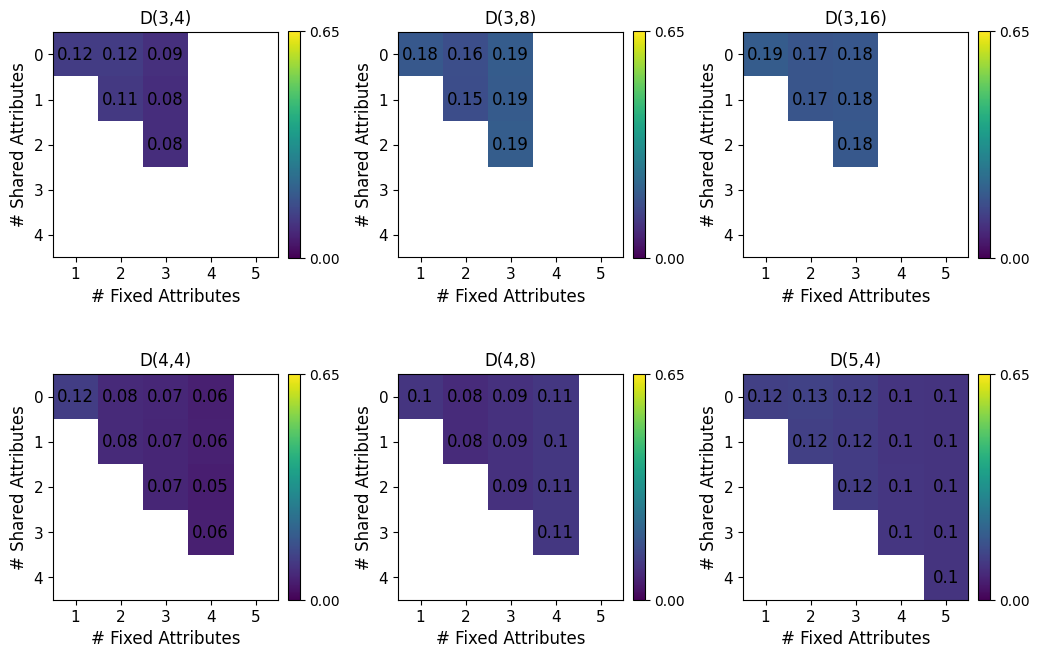

In [53]:
plot_heatmap_concept_x_context(posdis, score='posdis', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 12, ylims=(0,0.65))

### Bosdis

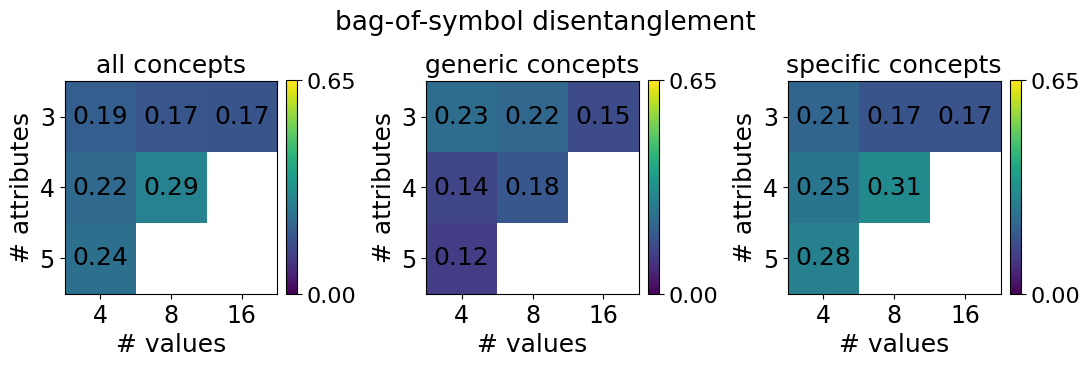

In [48]:
plot_heatmap([bosdis, bosdis_generic, bosdis_specific], 'mean', plot_dims=(1,3), ylims=[0.0,0.65], figsize=(11,3.5),
             titles=['all concepts', 'generic concepts', 'specific concepts'], suptitle='bag-of-symbol disentanglement', suptitle_position=1.)

In [49]:
bosdis = []

for d, dataset in enumerate(datasets): 
    sublist = []
    for run in range(5):
        sublist.append(pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/bosdis_scores.pkl', 'rb')))
    bosdis.append(sublist)

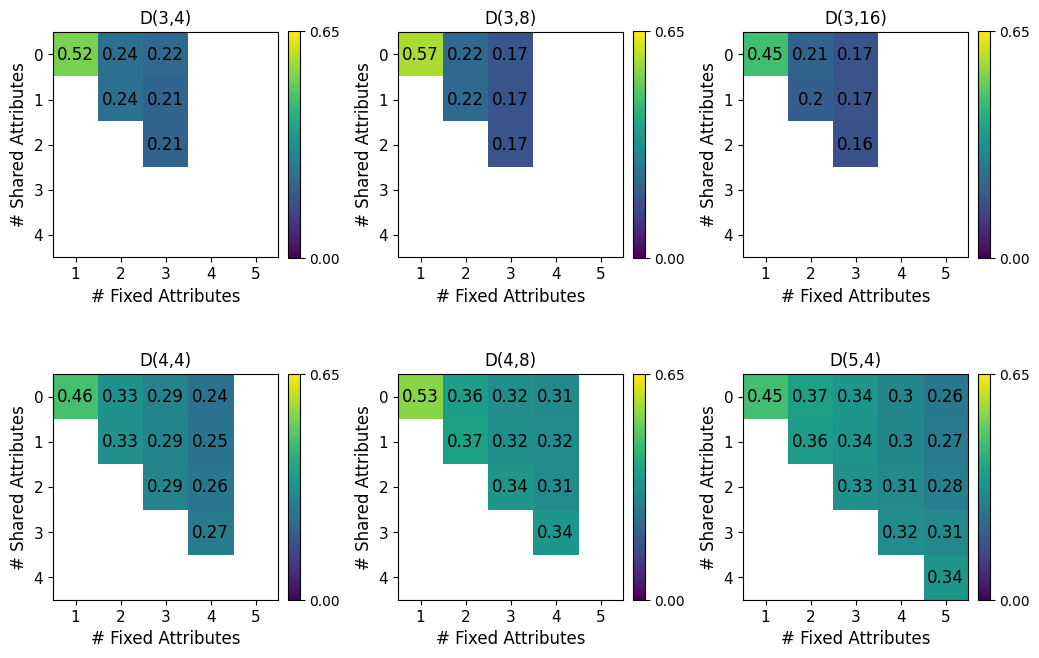

In [50]:
plot_heatmap_concept_x_context(bosdis, score='bosdis', mode='mean', plot_dims=(2,3), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 12, ylims=(0,0.65))

### Compositionality per dataset

In [35]:
# compositionality scores for each data set

compositionality_scores = {'dataset':[], 'run':[], 'metric':[], 'data':[], 'score':[]}

for d, dataset in enumerate(datasets): 
    for run in range(5):
        
        topsim = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/topsim_final.pkl', 'rb'))
        disent = pickle.load(open(paths[d] + '/' + setting + '/' + str(run) + '/posdis_bosdis.pkl', 'rb'))
        
        for metric in ['topsim', 'posdis', 'bosdis']:
            #for data in ['all', 'concrete']: 
            for data in ['all']:
                
                compositionality_scores['dataset'].append(dataset)
                compositionality_scores['run'].append(run)
                compositionality_scores['metric'].append(metric)
                compositionality_scores['data'].append(data)
                
                append = '' if data == 'all' else '_max_relevance'
                    
                if metric == 'topsim':
                    compositionality_scores['score'].append(topsim['topsim' + append + '_train'])
                if metric == 'posdis':
                    compositionality_scores['score'].append(disent['posdis' + append])
                if metric == 'bosdis':
                    compositionality_scores['score'].append(disent['bosdis' + append])

compositionality_scores = pd.DataFrame(compositionality_scores)

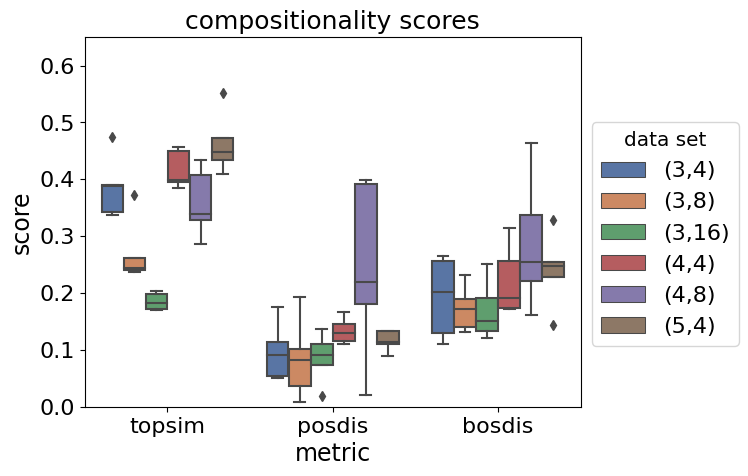

In [40]:
sns.boxplot(x='metric', y='score', data=compositionality_scores[compositionality_scores.data=='all'], 
            hue='dataset', palette='deep')
plt.xlabel(xlabel='metric', fontsize=17)
plt.ylabel(ylabel='score', fontsize=17)
plt.xticks(fontsize=16)
plt.yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], fontsize=16)
plt.ylim(0, 0.65)
legend = plt.legend(fontsize=16, title='data set', bbox_to_anchor=(1., 0.8))
plt.setp(legend.get_title(),fontsize='x-large')
plt.title('compositionality scores', fontsize=18)
plt.show()

## Errors

In [200]:
validation = True # set to false if training interaction should be used
setting = 'standard'

In [57]:
import torch
from utils.analysis_from_interaction import *

In [201]:
def error_analysis(datasets, paths, setting, n_epochs, n_values, validation=True):
    """
    goes through interactions, retrieves concept and context conditions and counts errors, 
    i.e. incorrectly classified objects (by the receiver)
    """
    all_error_concepts = {}
    all_error_contexts = {}
    all_error_concept_x_context = {}
    all_false_positives = {}
    all_false_negatives = {}
    all_total_errs = {}

    all_acc_concept_x_context = {}

    all_total_concepts = {}
    all_total_contexts = {}
    all_total_concept_x_context = {}

    # go through all datasets
    for i, d in enumerate(datasets):
        print(i, d)
        error_concepts = {}
        error_contexts = {}
        error_concept_x_context = {}
        false_positives = {}
        false_negatives = {}
        total_errs = {}
        acc_concept_x_context = {}
        # select first run
        path_to_run = paths[i] + '/' + str(setting) + '/' + str(0) + '/'
        path_to_interaction_train = (path_to_run + 'interactions/train/epoch_' + str(n_epochs) + '/interaction_gpu0')
        path_to_interaction_val = (path_to_run + 'interactions/validation/epoch_' + str(n_epochs) + '/interaction_gpu0')
        if validation:
            interaction = torch.load(path_to_interaction_val)
        else:
            interaction = torch.load(path_to_interaction_train)

        total_concepts = obtain_concept_counts(interaction.sender_input, n_values[i])

        total_contexts = obtain_context_counts(interaction.sender_input, n_values[i])

        total_concept_x_context = obtain_concept_x_context_counts(interaction.sender_input, n_values[i])

        for j in range(len(interaction.sender_input)):
            receiver_pred = (interaction.receiver_output[j][-1] > 0).float()  # use last symbol of message

            (objects, fixed) = get_fixed_vectors(interaction.sender_input, n_values[i], j)
            concept_str = str(int(sum(fixed[0])))

            context_conds = get_context_cond(interaction.sender_input, n_values[i], j, objects, fixed)
            context_str = str(context_conds[0])
            concept_x_context_str = (context_conds[0], int(sum(fixed[0]) - 1))
            
            # check if receiver has classified all objects correctly as targets or distractors
            if not torch.equal(receiver_pred, interaction.labels[j]):
                if concept_str in error_concepts:
                    error_concepts[concept_str] += 1
                else:
                    error_concepts[concept_str] = 1

                if context_str in error_contexts:
                    error_contexts[context_str] += 1
                else:
                    error_contexts[context_str] = 1

                if concept_x_context_str in error_concept_x_context:
                    error_concept_x_context[concept_x_context_str] += 1
                else:
                    error_concept_x_context[concept_x_context_str] = 1
                    
                # calculate false positives and false negatives
                num_false_pos = 0
                num_false_neg = 0
                errors = receiver_pred - interaction.labels[j]
                for error in errors:
                    # false positives
                    if error > 0:
                        num_false_pos += 1
                    # false negatives
                    elif error < 0:
                        num_false_neg += 1
                if concept_x_context_str in false_positives:
                    false_positives[concept_x_context_str] += num_false_pos
                else:
                    false_positives[concept_x_context_str] = num_false_pos
                if concept_x_context_str in false_negatives:
                    false_negatives[concept_x_context_str] += num_false_neg
                else:
                    false_negatives[concept_x_context_str] = num_false_neg
                if concept_x_context_str in total_errs:
                    total_errs[concept_x_context_str] += (num_false_pos + num_false_neg)
                else:
                    total_errs[concept_x_context_str] = (num_false_pos + num_false_neg)
                #print("per round", error_concept_x_context)
                #print("total", total_errs)

            # check if receiver has classified some objects correctly as targets or distractors
            # (this is how the accuracy is calculated during training)
            if concept_x_context_str in acc_concept_x_context:
                acc_concept_x_context[concept_x_context_str] += (
                    (receiver_pred == interaction.labels[j]).float().mean().numpy())
            else:
                acc_concept_x_context[concept_x_context_str] = (
                        receiver_pred == interaction.labels[j]).float().mean().numpy()
                
        #print(error_concept_x_context)
        #print("total errs", total_errs)
        #print("total cxc", total_concept_x_context)

        all_error_concepts[d] = error_concepts
        all_error_contexts[d] = error_contexts
        all_error_concept_x_context[d] = error_concept_x_context
        all_false_positives[d] = false_positives
        all_false_negatives[d] = false_negatives
        all_total_errs[d] = total_errs

        all_acc_concept_x_context[d] = acc_concept_x_context

        all_total_concepts[d] = total_concepts
        all_total_contexts[d] = total_contexts
        all_total_concept_x_context[d] = total_concept_x_context

    return (all_error_concepts, all_error_contexts, all_error_concept_x_context, 
            all_false_positives, all_false_negatives, all_total_errs, all_acc_concept_x_context,
            all_total_concepts, all_total_contexts, all_total_concept_x_context)

In [202]:
(all_error_concepts, all_error_contexts, all_error_concept_x_context, 
 all_false_positives, all_false_negatives, all_total_errs, all_acc_concept_x_context,
 all_total_concepts, all_total_contexts, all_total_concept_x_context) = error_analysis(datasets, paths, setting, n_epochs, n_values, validation)

0 (3,4)
1 (3,8)
2 (3,16)
3 (4,4)
4 (4,8)
5 (5,4)


In [101]:
err_ratio_concept_x_context = {}
for i, d in enumerate(datasets):
    ratio_concept_x_context = {}
    for concept_x_context in all_total_concept_x_context[d].keys():
        if concept_x_context in all_error_concept_x_context[d]:
            ratio_concept_x_context[concept_x_context] = round(all_error_concept_x_context[d][concept_x_context] / all_total_concept_x_context[d][concept_x_context], 4)
        else:
            ratio_concept_x_context[concept_x_context] = 0 # 0 if no error for this conditions is found
    err_ratio_concept_x_context[d] = ratio_concept_x_context

In [158]:
all_total_errs['(3,4)'] # how many objects were classified incorrectly per condition

{(2, 2): 92, (0, 1): 17, (1, 1): 60}

In [164]:
all_error_concept_x_context['(3,4)'] # how often data in a specific condition was classified incorrectly

{(2, 2): 34, (0, 1): 4, (1, 1): 16}

In [159]:
all_total_concept_x_context['(3,4)'] # how often the specific concept x context condition is present in the interaction

{(0, 2): 118, (2, 2): 144, (1, 2): 121, (1, 1): 101, (0, 1): 91, (0, 0): 21}

In [149]:
false_positives_ratio = {}
for i, d in enumerate(datasets):
    print(d)
    ratio_concept_x_context = {}
    for concept_x_context in all_total_concept_x_context[d].keys():
        print(concept_x_context)
        if concept_x_context in all_false_positives[d]:
            ratio_concept_x_context[concept_x_context] = round(all_false_positives[d][concept_x_context] / #* (all_total_errs[d][concept_x_context] / 
            all_total_concept_x_context[d][concept_x_context], 4)
            #print(all_false_positives[d][concept_x_context] / all_total_errs[d][concept_x_context])
            print(all_total_errs[d][concept_x_context], all_total_concept_x_context[d][concept_x_context], all_total_errs[d][concept_x_context] / all_total_concept_x_context[d][concept_x_context])
            print(all_false_positives[d][concept_x_context], all_false_positives[d][concept_x_context] / all_total_concept_x_context[d][concept_x_context])
        else:
            ratio_concept_x_context[concept_x_context] = 0 # 0 if no error for this conditions is found
    false_positives_ratio[d] = ratio_concept_x_context

(3,4)
(0, 2)
(2, 2)
92 144 0.6388888888888888
92 0.6388888888888888
(1, 2)
(1, 1)
60 101 0.594059405940594
23 0.22772277227722773
(0, 1)
17 91 0.18681318681318682
0 0.0
(0, 0)
(3,8)
(1, 1)
190 402 0.472636815920398
40 0.09950248756218906
(0, 2)
1 1022 0.0009784735812133072
1 0.0009784735812133072
(2, 2)
370 1025 0.36097560975609755
370 0.36097560975609755
(1, 2)
12 986 0.012170385395537525
12 0.012170385395537525
(0, 1)
117 399 0.2932330827067669
0 0.0
(0, 0)
26 44 0.5909090909090909
0 0.0
(3,16)
(1, 2)
303 8253 0.036713922210105415
133 0.016115351993214587
(2, 2)
4144 8132 0.5095917363502214
3954 0.48622725036891296
(0, 1)
739 1562 0.4731113956466069
10 0.006402048655569782
(0, 2)
134 8168 0.016405484818805095
4 0.0004897159647404506
(1, 1)
1150 1561 0.7367072389493914
456 0.29212043561819345
(0, 0)
226 92 2.4565217391304346
11 0.11956521739130435
(4,4)
(1, 3)
(1, 2)
71 495 0.14343434343434344
0 0.0
(3, 3)
283 526 0.5380228136882129
283 0.5380228136882129
(1, 1)
56 188 0.2978723404255

In [203]:
false_objects_ratio = {}
for i, d in enumerate(datasets):
    ratio_concept_x_context = {}
    for concept_x_context in all_total_concept_x_context[d].keys():
        if concept_x_context in all_total_errs[d]:
            ratio_concept_x_context[concept_x_context] = round(all_total_errs[d][concept_x_context] / (all_total_concept_x_context[d][concept_x_context]), 4)
        else:
            ratio_concept_x_context[concept_x_context] = 0 # 0 if no error for this conditions is found
    false_objects_ratio[d] = ratio_concept_x_context

In [194]:
false_positives_ratio = {}
for i, d in enumerate(datasets):
    ratio_concept_x_context = {}
    for concept_x_context in all_total_concept_x_context[d].keys():
        if concept_x_context in all_false_positives[d]:
            ratio_concept_x_context[concept_x_context] = round(all_false_positives[d][concept_x_context] / (all_total_errs[d][concept_x_context]), 4)
        else:
            ratio_concept_x_context[concept_x_context] = 0 # 0 if no error for this conditions is found
    false_positives_ratio[d] = ratio_concept_x_context

In [195]:
false_negatives_ratio = {}
for i, d in enumerate(datasets):
    ratio_concept_x_context = {}
    for concept_x_context in all_total_concept_x_context[d].keys():
        if concept_x_context in all_false_negatives[d]:
            ratio_concept_x_context[concept_x_context] = round(all_false_negatives[d][concept_x_context] / (all_total_errs[d][concept_x_context]), 4)
        else:
            ratio_concept_x_context[concept_x_context] = 0 # 0 if no error for this conditions is found
    false_negatives_ratio[d] = ratio_concept_x_context

In [94]:
acc_ratio_concept_x_context = {}
for i, d in enumerate(datasets):
    ratio_concept_x_context = {}
    for concept_x_context in all_total_concept_x_context[d].keys():
        if concept_x_context in all_acc_concept_x_context[d]:
            ratio_concept_x_context[concept_x_context] = round(all_acc_concept_x_context[d][concept_x_context] / all_total_concept_x_context[d][concept_x_context], 4)
        else:
            ratio_concept_x_context[concept_x_context] = 0 # 0 if no error for this conditions is found
    acc_ratio_concept_x_context[d] = ratio_concept_x_context

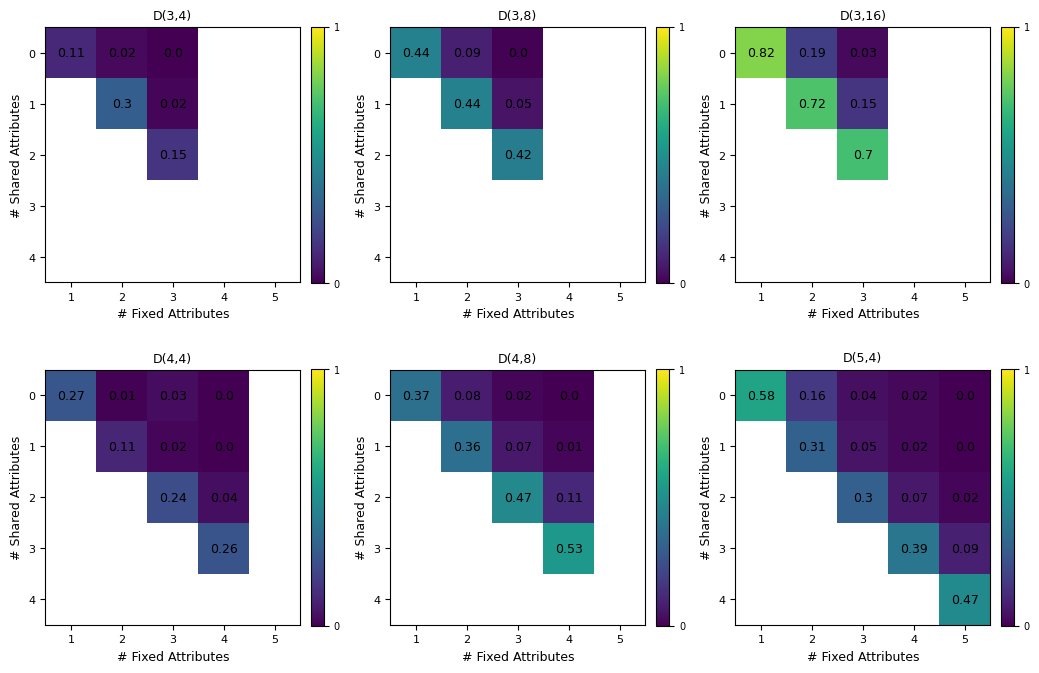

In [104]:
plot_heatmap_concept_x_context_errors(err_ratio_concept_x_context, ylims=(0, 1.0), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 9)

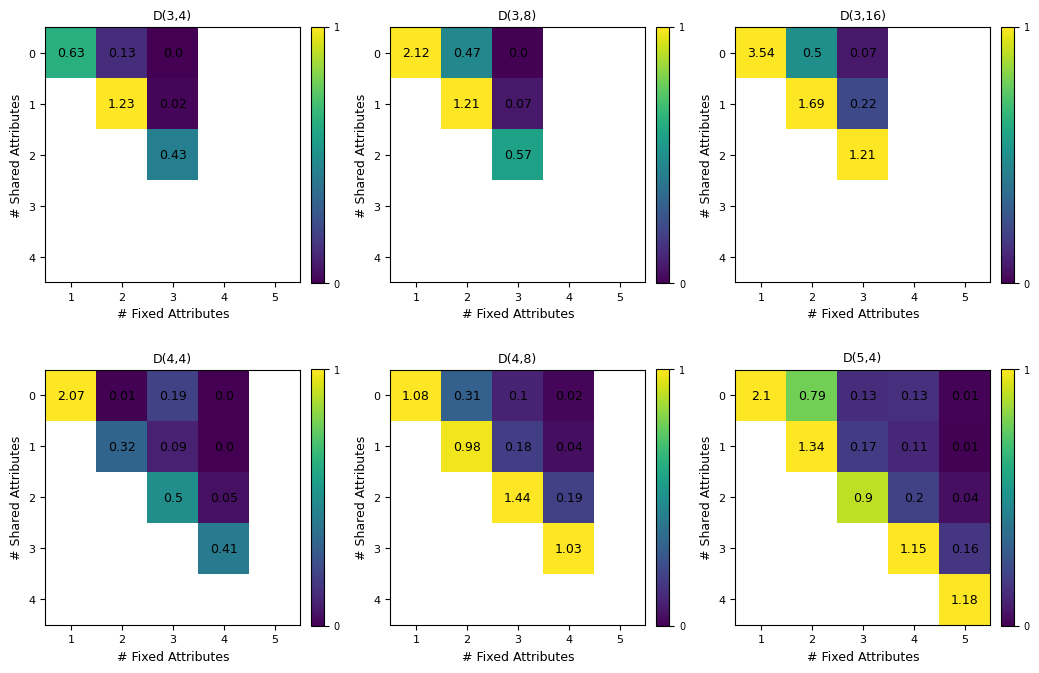

In [204]:
plot_heatmap_concept_x_context_errors(false_objects_ratio, ylims=(0, 1.0), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 9)

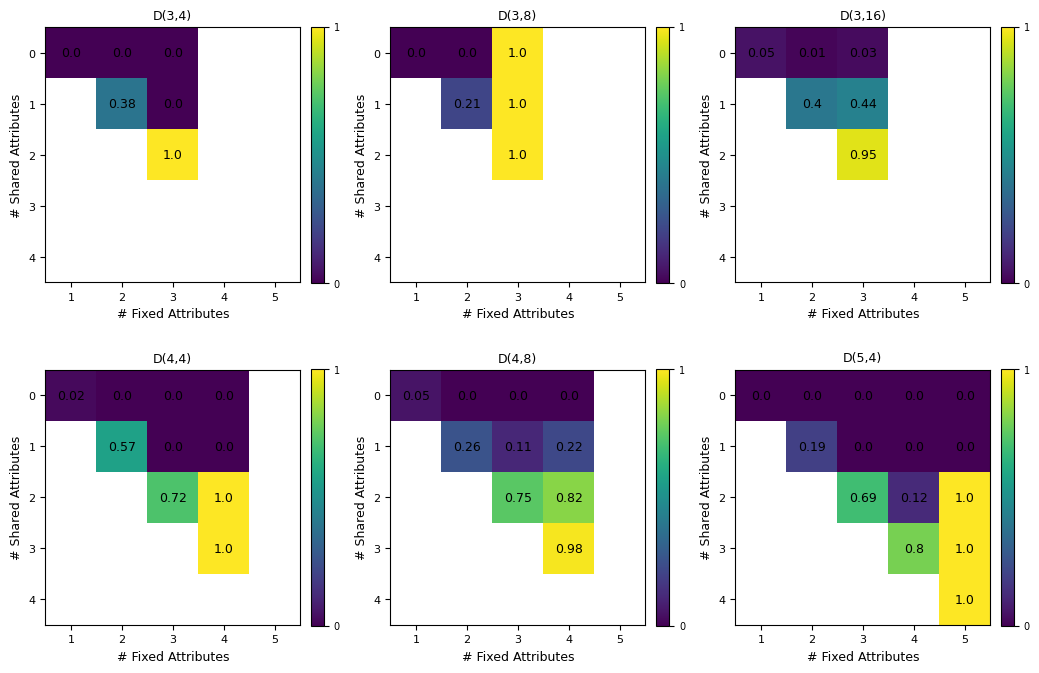

In [196]:
plot_heatmap_concept_x_context_errors(false_positives_ratio, ylims=(0, 1.0), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 9)

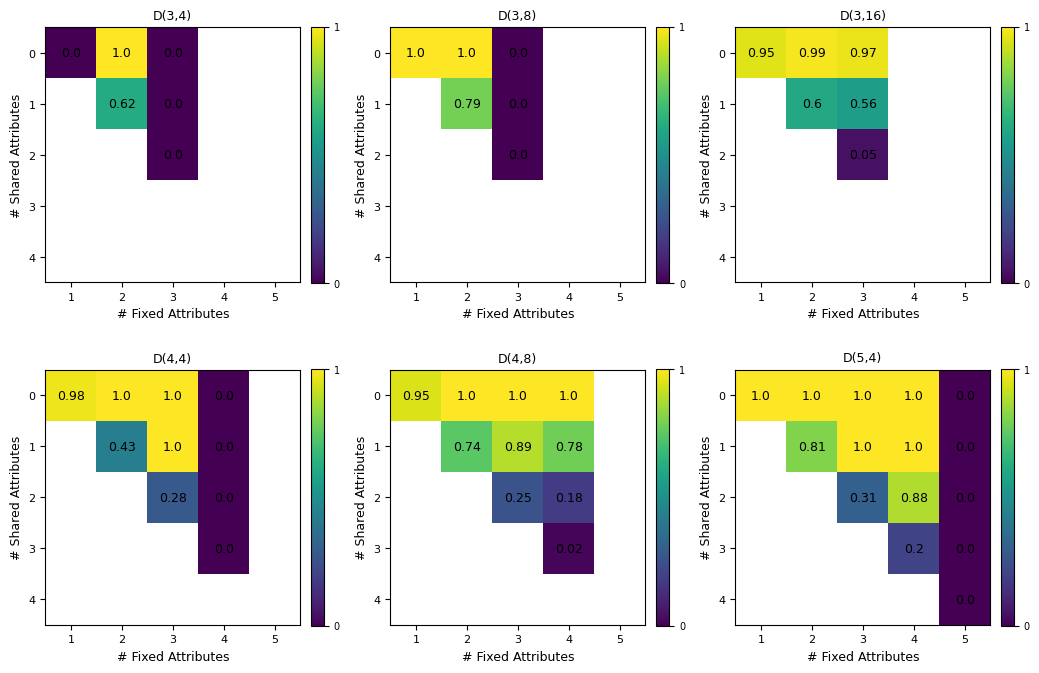

In [197]:
plot_heatmap_concept_x_context_errors(false_negatives_ratio, ylims=(0, 1.0), heatmap_size=(5,5), 
                                figsize=(10.5, 7), fontsize = 9)

In [210]:
import numpy as np
from collections import Counter

# Gegebene Liste von Objekten
# objects = [(2, 1, 0,), (2, 1, 0), (2, 1, 0), (2, 1, 1), (0, 1, 0), (2, 0, 0)] # 1.79
objects = [(2, 1, 0,), (2, 1, 0), (2, 1, 0)] # 2.58
objects = [(2, 1, 0,), (2, 0, 1), (2, 2, 2), (1, 1, 1), (0, 1, 0), (1, 0, 0)] # 2.58

# 1. Bestimme die Häufigkeit jedes einzigartigen Objekts in der Liste
object_counts = Counter(objects)

# 2. Berechne die relative Häufigkeit jedes Objekts
total_objects = len(objects)
object_probabilities = {obj: count / total_objects for obj, count in object_counts.items()}

# 3. Verwende die Formel für die Entropie, um die Entropie zu berechnen
entropy = -sum(prob * np.log2(prob) for prob in object_probabilities.values())

# Ausgabe der berechneten Entropie
print("Die berechnete Entropie beträgt:", entropy)

Die berechnete Entropie beträgt: 2.584962500721156


In [206]:
import numpy as np
from collections import Counter

# Gegebene Liste von Objekten
objects = [(2, 1, 0,), (2, 1, 0), (2, 1, 0), (2, 1, 1), (0, 1, 0), (2, 0, 0)]

# Transpose the list of objects to get attributes as columns
attributes = np.array(objects).T

# Initialize a list to store the entropy for each attribute
attribute_entropy = []

# Calculate entropy for each attribute
for attribute_values in attributes:
    # 1. Bestimme die Häufigkeit jedes einzigartigen Werts in der Liste
    attribute_counts = Counter(attribute_values)
    
    # 2. Berechne die relative Häufigkeit jedes Werts
    total_values = len(attribute_values)
    value_probabilities = {value: count / total_values for value, count in attribute_counts.items()}
    
    # 3. Verwende die Formel für die Entropie, um die Entropie zu berechnen
    entropy = -sum(prob * np.log2(prob) for prob in value_probabilities.values() if prob != 0)
    
    attribute_entropy.append(entropy)

# Ausgabe der berechneten Entropie für jedes Attribut
print("Die berechnete Entropie für jedes Attribut beträgt:", attribute_entropy)

Die berechnete Entropie für jedes Attribut beträgt: [0.6500224216483541, 0.6500224216483541, 0.6500224216483541]


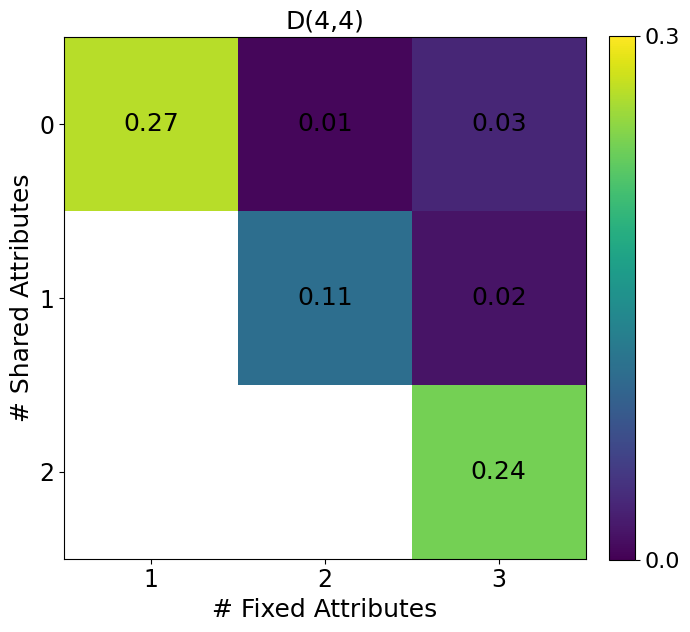

In [211]:
plot_heatmap_concept_x_context_errors(err_ratio_concept_x_context['(4,4)'], one_dataset=True, attributes=4, titles=('D(4,4)',), ylims=(0, 0.3), plot_dims=(1, 1))

## co-occurrences (not done yet)

In [ ]:
# Not done (yet)
full_plot = False

fig = plt.figure(figsize=(12,3))

for d, dim in enumerate(datasets): 
    
    data = datasets[d]
    path = paths[d]
    vs_factor = int(path[-2])
    vocab_size = (n_values[d] + 1) * vs_factor + 1
    colors = plt.cm.jet(np.linspace(0,1,vocab_size))
    
    average_cooccurences = []
    
    plt.subplot(1,6,d+1)
    
    for run in range(5):
        
        cooccurences = pickle.load(open(paths[d] + 'standard/' + str(run) + '/normalized_cooccurrence.pkl', 'rb'))
        indices = np.flip(np.argsort(cooccurences[:,-1]))
        cooccurences = cooccurences[indices]
        average_cooccurences.append(cooccurences)
        
    average_cooccurences = np.flip(np.mean(average_cooccurences, axis=0), axis=1)
    
    data_dict = {}
    data_dict['symbol rank'] = []
    data_dict['level'] = []
    data_dict['value'] = []
    for symbol in indices:
        for level in range(average_cooccurences.shape[1]):
            data_dict['symbol rank'].append(symbol+1)
            data_dict['level'].append(level)
            data_dict['value'].append(average_cooccurences[symbol, level])
    
    if full_plot:
        g = sns.heatmap(average_cooccurences, cmap='viridis')
        plt.yticks(ticks=[0.5,vocab_size-1.5], labels=[1,vocab_size], fontsize=14)
    else: 
        g = sns.heatmap(average_cooccurences[0:10,:], cmap='viridis')
        plt.yticks(ticks=[0.5,9.5], labels=[1,10], fontsize=14, rotation=0)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=13)
    for _, spine in g.spines.items():
        spine.set_visible(True)
    #plt.xlabel('# relevant attributes', fontsize=14)
    #plt.ylabel('symbol rank', fontsize=14)
    plt.xticks(ticks=np.arange(n_attributes[d])+0.5, labels=range(1,n_attributes[d]+1), fontsize=14)
    plt.title(data, fontsize=14)
    
    fig.text(0.5, -0.05, '# relevant attributes', ha='center', va='center', fontsize=15, alpha=0.3)
    fig.text(-0.01, 0.5, 'symbol rank', ha='center', va='center', rotation='vertical', fontsize=15, alpha=0.3)

plt.tight_layout()